# Bank Marketing data preprocessing for Machine Learning

Step 1: Import all packages

In [5]:
import pandas as pd 
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns
import csv


Step 2: Load data set

In [6]:
Bank = pd.read_csv('bank-additional-full.csv')

Step 3: Analysing the data

<AxesSubplot:>

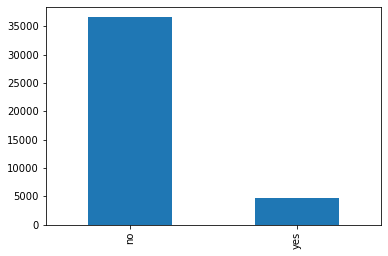

In [7]:
Bank['y'].value_counts().plot(kind='bar')#clearly shows class imbalance

Step 4 : Cleaning data

Check for missing and NA values

In [8]:
print(Bank.columns[Bank.isna().any()])
print(Bank.shape[0] - Bank.count())

Index([], dtype='object')
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


Renaming the columns for clarity

In [9]:
Bank.rename(columns={'y':'target','emp.var.rate':'emp_var_rate','cons.price.idx':'cons_price_idx','cons.conf.idx':'cons_conf_idx','nr.employed':'nr_employed'},inplace= True)

Checking the number of numeric and categorical features

In [10]:
numerical = Bank.select_dtypes(exclude="object") 
catgorical = Bank.select_dtypes(include="object")
print(f'Number of Numerical features: {len(numerical.columns)}')
print(f'Number of Categorical features: {len(catgorical.columns)}')
print(numerical.describe().round().T)

Number of Numerical features: 10
Number of Categorical features: 11
                  count    mean    std     min     25%     50%     75%     max
age             41188.0    40.0   10.0    17.0    32.0    38.0    47.0    98.0
duration        41188.0   258.0  259.0     0.0   102.0   180.0   319.0  4918.0
campaign        41188.0     3.0    3.0     1.0     1.0     2.0     3.0    56.0
pdays           41188.0   962.0  187.0     0.0   999.0   999.0   999.0   999.0
previous        41188.0     0.0    0.0     0.0     0.0     0.0     0.0     7.0
emp_var_rate    41188.0     0.0    2.0    -3.0    -2.0     1.0     1.0     1.0
cons_price_idx  41188.0    94.0    1.0    92.0    93.0    94.0    94.0    95.0
cons_conf_idx   41188.0   -41.0    5.0   -51.0   -43.0   -42.0   -36.0   -27.0
euribor3m       41188.0     4.0    2.0     1.0     1.0     5.0     5.0     5.0
nr_employed     41188.0  5167.0   72.0  4964.0  5099.0  5191.0  5228.0  5228.0


Replacing and removing the unnecessary values and column as per the instruction provided in the attribute information of the data set

In [11]:
#pdays : 999 means client was not previously contacted  .which means it needs to be replaced with 0 values
Bank.pdays.replace({999:0},inplace = True)
#print(Bank.pdays)
#Also column duration is discarded to have a realistic predictive model.Including the same would highly effect the prediction hence dropping this column
Bank.drop(['duration'],axis= 'columns',inplace =True)

----------------------Detecting and removing outliers---------------------------------------------

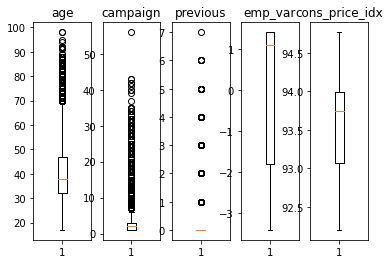

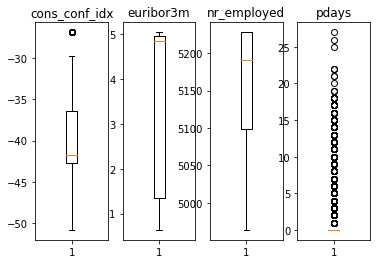

In [12]:
#Outliers detected for numerical features
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)
ax1.boxplot(Bank['age']) #Outliers visible starting from around 68-69
ax1.set_title('age')
ax2.boxplot(Bank['campaign'])# Outliers visible
ax2.set_title('campaign')
ax3.boxplot(Bank['previous'])# Outliers visible(column needs to be removed)
ax3.set_title('previous')
ax4.boxplot(Bank['emp_var_rate'])
ax4.set_title('emp_var')
ax5.boxplot(Bank['cons_price_idx'])
ax5.set_title('cons_price_idx')
plt.show()

f, (ax6,ax7,ax8,ax9) = plt.subplots(1, 4)

ax6.boxplot(Bank['cons_conf_idx'])# Outliers visible
ax6.set_title('cons_conf_idx')
ax7.boxplot(Bank['euribor3m'])
ax7.set_title('euribor3m')
ax8.boxplot(Bank['nr_employed'])
ax8.set_title('nr_employed')
ax9.boxplot(Bank['pdays'])
ax9.set_title('pdays')

plt.show()

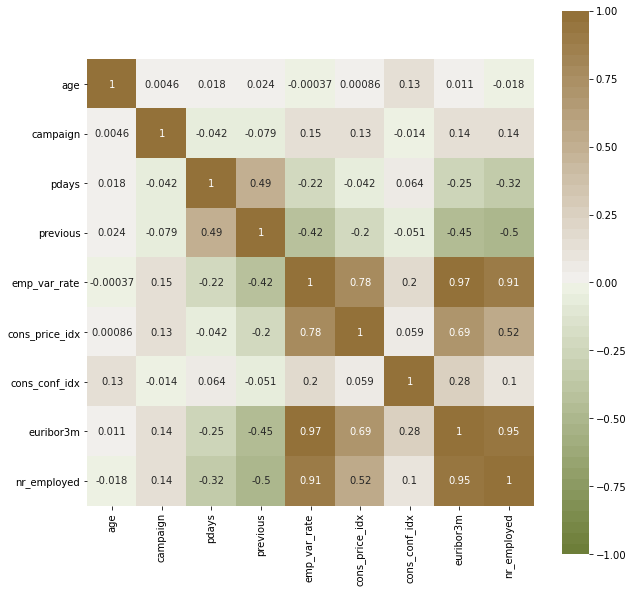

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = Bank.corr()
#plot the heatmap and annotation on it
plt.figure(figsize = (10,10))
ax= sns.heatmap(
    corr, 
    vmin= -1, vmax= 1,
    cmap=sns.diverging_palette(100, 415, n=50),
    annot= True,
    square= True
)


In [14]:
#just like 'duration', 'previous' and 'pdays' column need to be droped as removing the outliers will effect the prediction against people who takes fixed deposit
Bank.drop(['previous','pdays'],axis='columns',inplace = True)

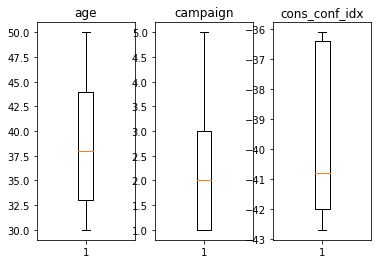

In [15]:
# calculate the mean and standard deviations of the columns with outliers
meanAge = Bank['age'].mean()
stdDevAge = Bank['age'].std()
Age_Upper_Limit = meanAge + stdDevAge
Age_Lower_Limit = meanAge - stdDevAge
Bank1 = Bank[(Bank['age']<Age_Upper_Limit)& (Bank['age']> Age_Lower_Limit)] #[630 rows x 18 columns]

meanCamp = Bank1['campaign'].mean()
stdDevCamp = Bank1['campaign'].std()
Camp_Upper_Limit = meanCamp + stdDevCamp
Camp_Lower_Limit = meanCamp - stdDevCamp
Bank2 = Bank1[(Bank1['campaign']<Camp_Upper_Limit)& (Bank1['campaign']> Camp_Lower_Limit)] #[630 rows x 18 columns]

meanCons = Bank2['cons_conf_idx'].mean()
stdDevCons = Bank2['cons_conf_idx'].std()
Cons_Upper_Limit = meanCons + stdDevCons
Cons_Lower_Limit = meanCons - stdDevCons
df = Bank2[(Bank2['cons_conf_idx']<Cons_Upper_Limit)& (Bank2['cons_conf_idx']> Cons_Lower_Limit)] #[630 rows x 18 columns]


f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.boxplot(df['age']) #Outliers visible starting from around 68-69
ax1.set_title('age')
ax2.boxplot(df['campaign'])# Outliers visible
ax2.set_title('campaign')
ax3.boxplot(df['cons_conf_idx'])# Outliers visible
ax3.set_title('cons_conf_idx')
plt.show()

checking for corelation in numeric values

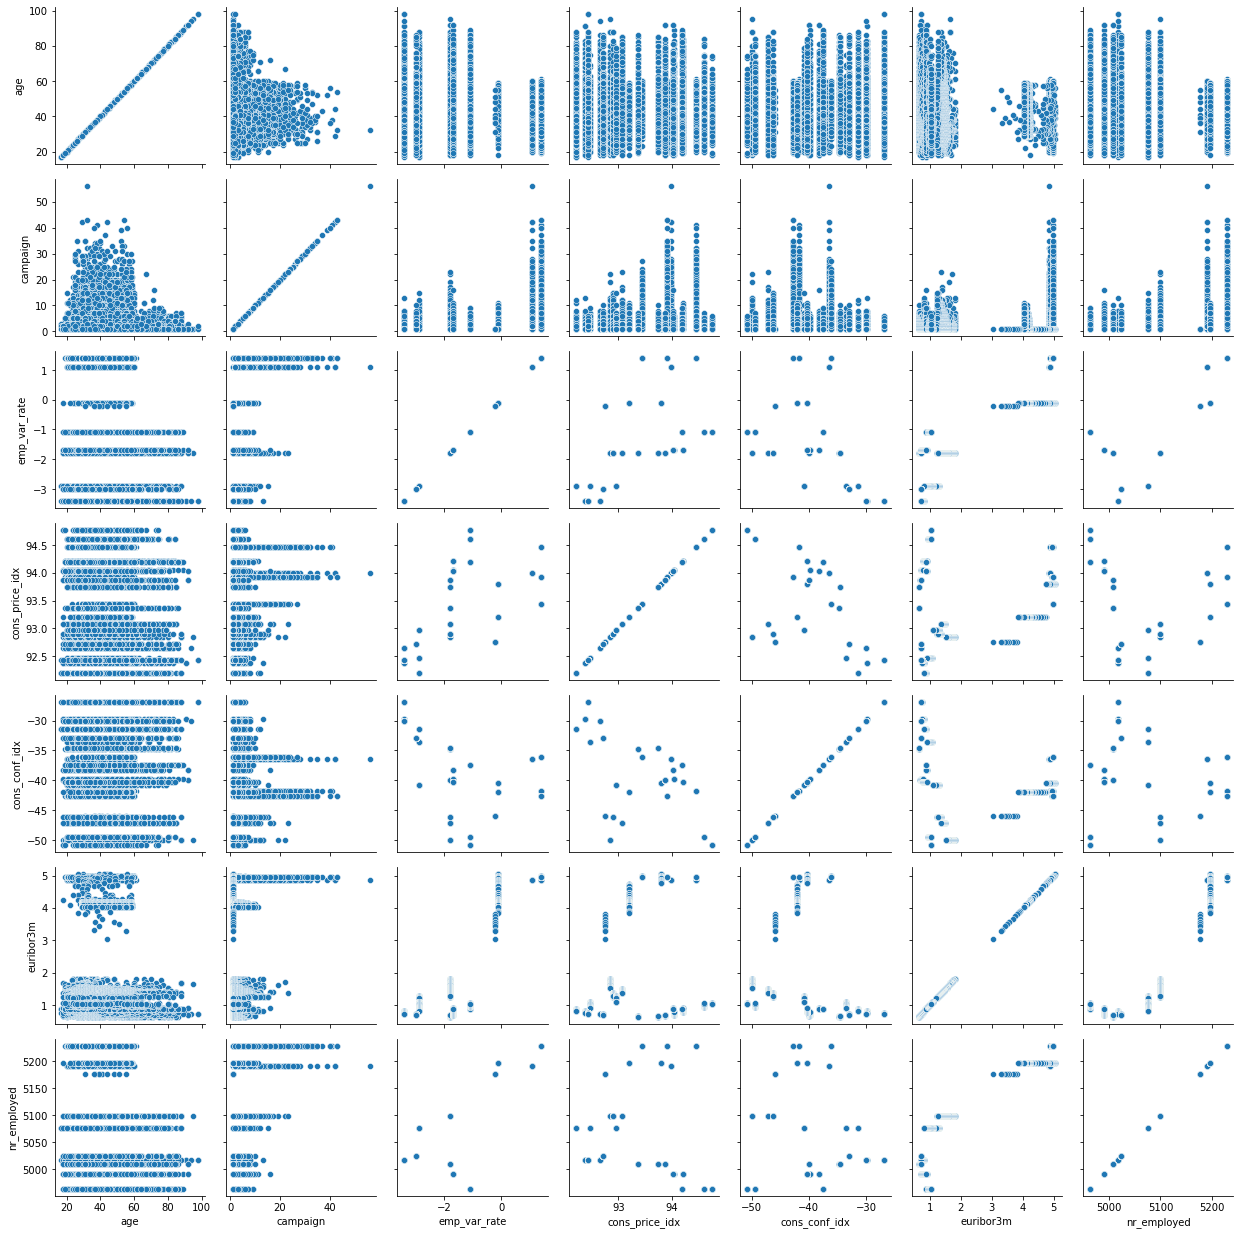

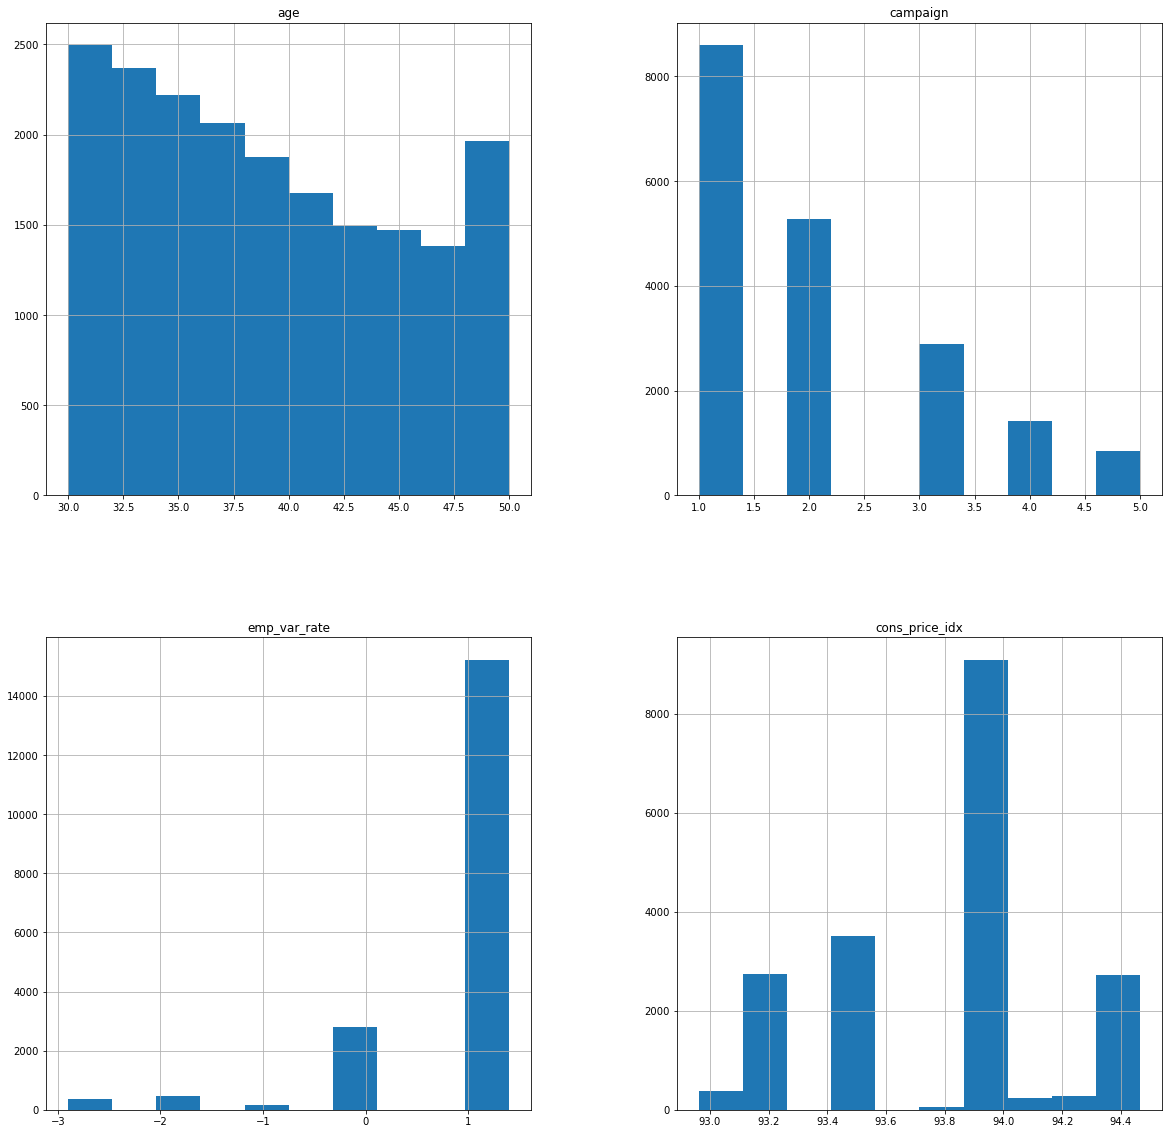

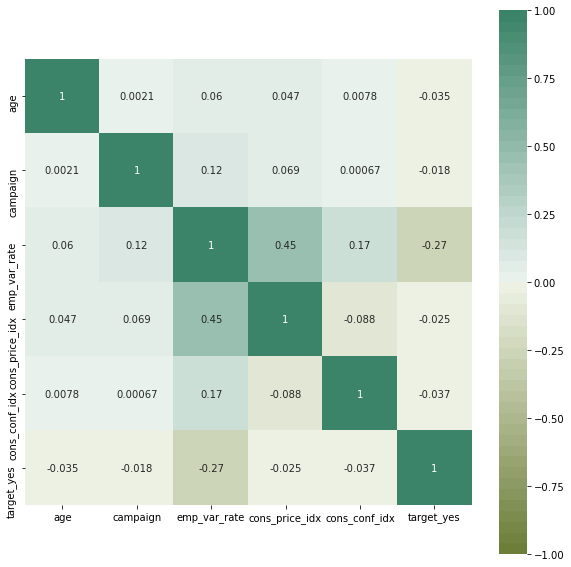

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
#-----------------Checking for corelations in numeric values----------------------------- 
g = sns.PairGrid(Bank)
g.map(sns.scatterplot)
plt.savefig('scatterplot.png', bbox_inches='tight')


numerical1 = df.select_dtypes(exclude="object")

numCols=df.shape[1]



fig, axisRows = plt.subplots(numCols//8+1, 2, figsize=(20, 20))
i = 0
for axisCols in axisRows:
    for axis in axisCols:
        if (i<numCols):
            numerical1.hist(column = numerical1.columns[i], bins = 10, ax=axis)
            i = i+1


corr = df.corr()
#plot the heatmap and annotation on it
plt.figure(figsize = (10,10))
ax= sns.heatmap(
    corr, 
    vmin= -1, vmax= 1,
    cmap=sns.diverging_palette(100, 515, n=50),
    annot= True,
    square= True
)

Checking Pearson's correlation between nr_employed,euribor3m,emp_var_rate columns

In [22]:
import scipy.stats as stats

corrPearson, pValPearson = stats.pearsonr(df['nr_employed'],df['euribor3m'])
print ("Pearson's correlation for nr_employed against euribor3m is", corrPearson, "with a p-value of",pValPearson)

corrPearson, pValPearson = stats.pearsonr(df['euribor3m'],df['emp_var_rate'])
print ("Pearson's correlation for emp_var_rate against euribor3m is", corrPearson, "with a p-value of",pValPearson)

corrPearson, pValPearson = stats.pearsonr(df['nr_employed'],df['emp_var_rate'])
print ("Pearson's correlation for emp_var_rate against nr_employed is", corrPearson, "with a p-value of",pValPearson)

#it clearly shows that there is huge correlation between nr_employed,euribor3m and emp_var_rate.Hence dropping 2 columns nr_employed and euribor3m
#also day of week and month indicates the last contact day of week and month which is not part of the research hence dropping them too
df.drop(['nr_employed','euribor3m','month','day_of_week'],axis ='columns',inplace = True)

Pearson's correlation for nr_employed against euribor3m is 0.927144349416217 with a p-value of 0.0
Pearson's correlation for emp_var_rate against euribor3m is 0.9243203295895439 with a p-value of 0.0
Pearson's correlation for emp_var_rate against nr_employed is 0.8112685706143038 with a p-value of 0.0


C:\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


checking columns for any null values

In [23]:
print(numerical1.describe().round().T)

#list of categorical variables
catgorical_df = df.select_dtypes(include="object")
print(f'List of Categorical features: {(catgorical_df.columns)}')
#list of numerical variables
numerical_df = df.select_dtypes(exclude="object")
print(f'List of Numerical features: {(numerical_df.columns)}')

print(df.shape[0] - df.count()) #no null values detected Data Cleaning completed

                  count    mean   std     min     25%     50%     75%     max
age             19016.0    39.0   6.0    30.0    33.0    38.0    44.0    50.0
campaign        19016.0     2.0   1.0     1.0     1.0     2.0     3.0     5.0
emp_var_rate    19016.0     1.0   1.0    -3.0     1.0     1.0     1.0     1.0
cons_price_idx  19016.0    94.0   0.0    93.0    93.0    94.0    94.0    94.0
cons_conf_idx   19016.0   -39.0   3.0   -43.0   -42.0   -41.0   -36.0   -36.0
euribor3m       19016.0     5.0   1.0     1.0     5.0     5.0     5.0     5.0
nr_employed     19016.0  5202.0  47.0  4964.0  5191.0  5228.0  5228.0  5228.0
List of Categorical features: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome', 'target'],
      dtype='object')
List of Numerical features: Index(['age', 'campaign', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx'], dtype='object')
age               0
job               0
marital           0
education         0
default      

Replacing column values for easy classification

In [24]:
df["education"].replace({"basic.4y":"basic","basic.6y":"basic","basic.9y":"basic","high.school":"HighSchool","professional.course":"ProfessionalCourse","university.degree":"UniversityDegree"},inplace = True)
df["job"].replace({"technician":"employed","management":"employed","admin.":"employed","blue-collar":"employed","housemaid":"employed","services":"employed"},inplace = True)

print(df)

       age       job   marital         education  default housing loan  \
2       37  employed   married        HighSchool       no     yes   no   
3       40  employed   married             basic       no      no   no   
5       45  employed   married             basic  unknown      no   no   
7       41  employed   married           unknown  unknown      no   no   
10      41  employed   married           unknown  unknown      no   no   
...    ...       ...       ...               ...      ...     ...  ...   
40851   42  employed   married  UniversityDegree       no     yes   no   
40852   34  employed   married  UniversityDegree       no      no  yes   
40853   42  employed  divorced  UniversityDegree       no     yes   no   
40854   42  employed  divorced  UniversityDegree       no      no   no   
40855   41  employed   married           unknown       no      no   no   

         contact  campaign     poutcome  emp_var_rate  cons_price_idx  \
2      telephone         1  nonexisten

C:\Anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


Done one hot encoding on target variable (which includes subscription of term deposit)

In [25]:
df=pd.concat([df,pd.get_dummies(df['target'],prefix='target')],axis=1).drop(['target'],axis=1)
df.drop(['target_no'],axis ='columns',inplace = True)
print(df)

       age       job   marital         education  default housing loan  \
2       37  employed   married        HighSchool       no     yes   no   
3       40  employed   married             basic       no      no   no   
5       45  employed   married             basic  unknown      no   no   
7       41  employed   married           unknown  unknown      no   no   
10      41  employed   married           unknown  unknown      no   no   
...    ...       ...       ...               ...      ...     ...  ...   
40851   42  employed   married  UniversityDegree       no     yes   no   
40852   34  employed   married  UniversityDegree       no      no  yes   
40853   42  employed  divorced  UniversityDegree       no     yes   no   
40854   42  employed  divorced  UniversityDegree       no      no   no   
40855   41  employed   married           unknown       no      no   no   

         contact  campaign     poutcome  emp_var_rate  cons_price_idx  \
2      telephone         1  nonexisten

saving the processed data

In [26]:
#print(len(res))# row reduced to 19016
#df.to_csv('Bank Marketing clean data preprocessed Final.csv',index= False)